In [1]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# reading the data
bike_sharing= pd.read_csv('C:\\Users\\Admin\\Downloads\\Machine_Learning\\Bike_sharing_assignment\\bike_sharing_data.csv')
bike_sharing.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bike_sharing.shape

(730, 16)

In [4]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### We can see there are no null values in the data set.

In [5]:
bike_sharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### All the variables have values increasing accordingly to the quantiles and hence we can say there are no outliers.

In [6]:
# dropping instant and dteday as instant is just the index and dteday is already described by mnth and weekday 

bike_sharing.drop(['instant','dteday'],axis=1, inplace=True)
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


<Figure size 600x600 with 0 Axes>

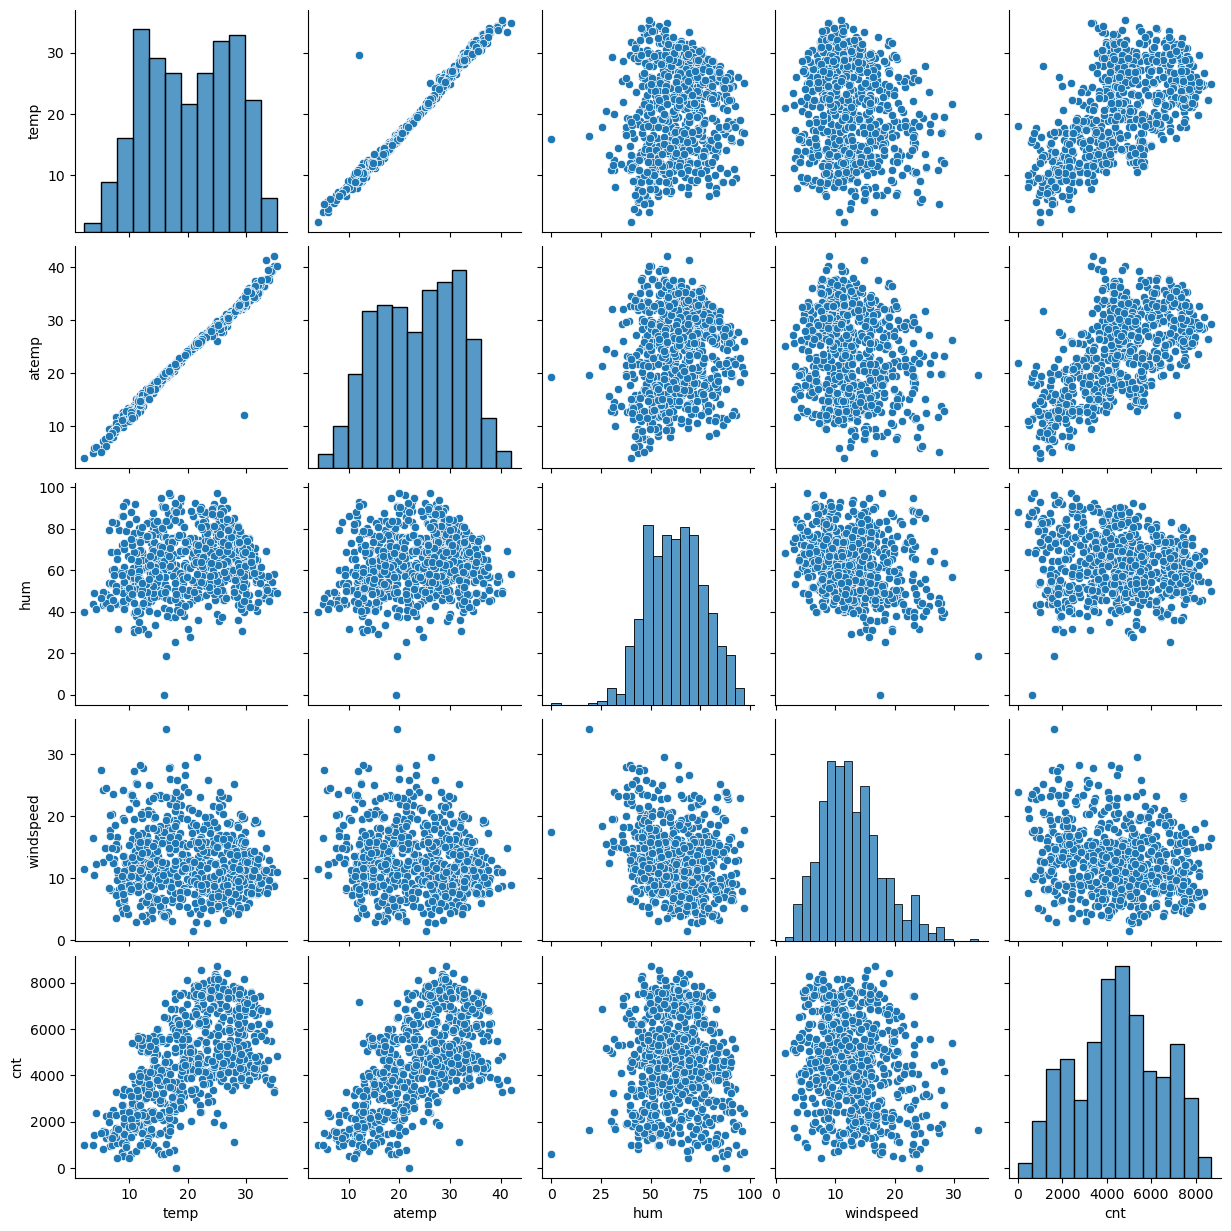

In [7]:
# plotting the numeric varibles to check for any relation

plt.figure(figsize=(6,6))
bike_sharing_num= bike_sharing[['temp','atemp','hum', 'windspeed', 'cnt']]
sns.pairplot(bike_sharing_num)
plt.show()

#### We can see that temp and atemp are highly correlated

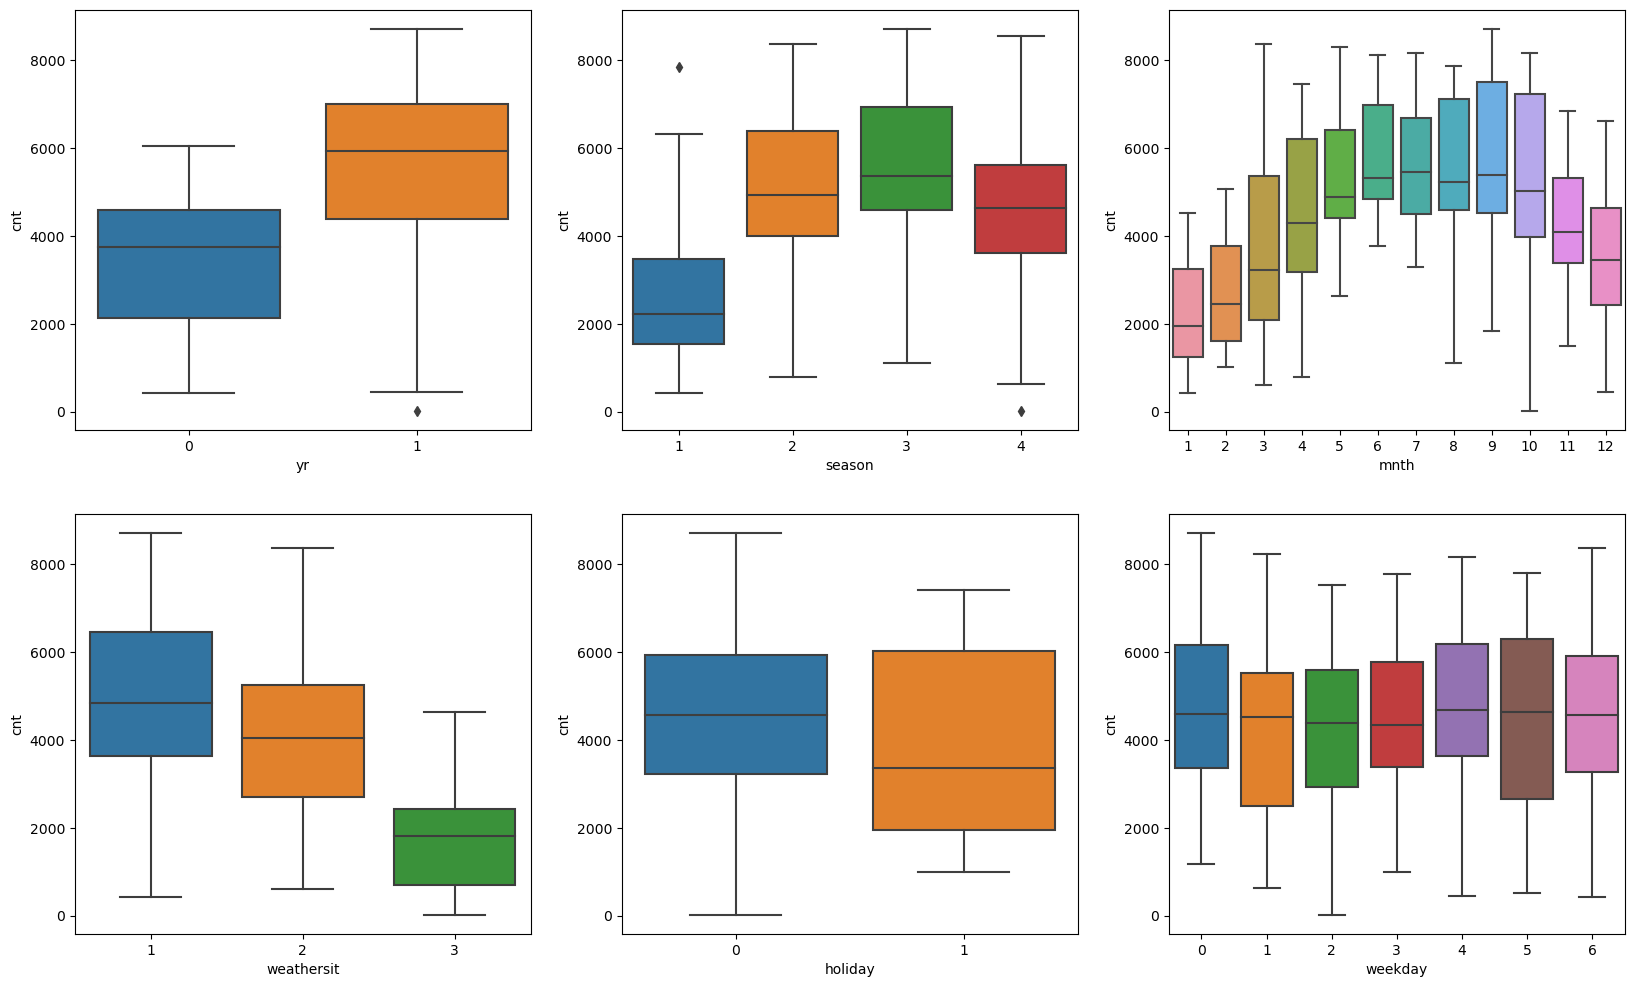

In [8]:
# plotting the categorical variables against target variable
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_sharing)
plt.subplot(2,3,2)
sns.boxplot(x = 'season', y = 'cnt', data = bike_sharing)
plt.subplot(2,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_sharing)
plt.subplot(2,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_sharing)
plt.subplot(2,3,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_sharing)
plt.subplot(2,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_sharing)
plt.show()

#### Here we can see yr, season, weathersit give some clear insights about the demand.

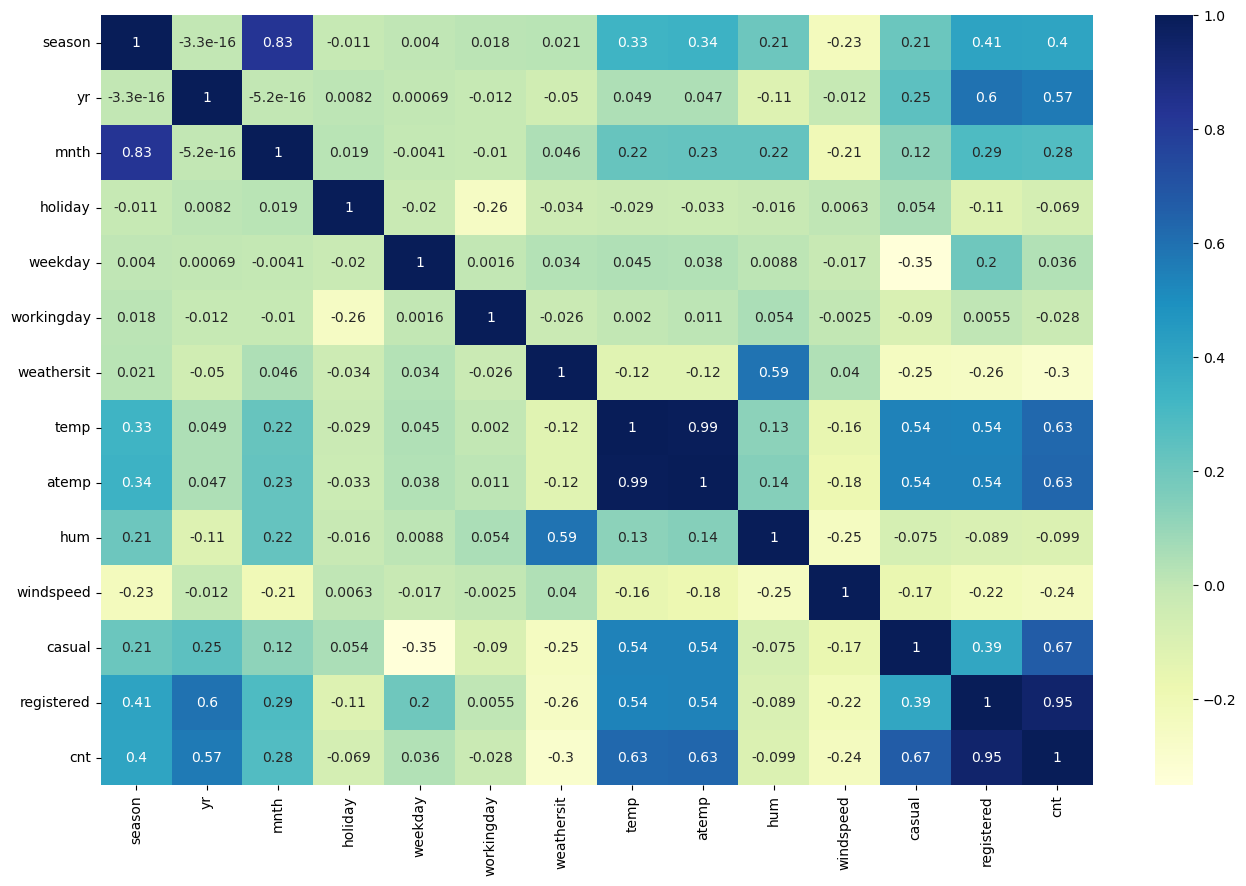

In [9]:
# plotting the correlation using heat map.

plt.figure(figsize = (16, 10))
sns.heatmap(bike_sharing.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### one interesting thing to note here is that registered and cnt has a correlation of 0.95, i.e most of the users are registered.

In [10]:
# we can drop registered and casual users as we are interested in the total users.
bike_sharing.drop(['registered','casual'],axis=1, inplace=True)
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


CREATING DUMMY VARIABLES FOR THE REQUIRED VARIABLES

In [11]:
bike_sharing = pd.get_dummies(data=bike_sharing, columns=['mnth','weekday','season'],drop_first=True)
bike_sharing = pd.get_dummies(data=bike_sharing, columns=['weathersit'])

bike_sharing.head()
 

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_2,mnth_3,...,weekday_3,weekday_4,weekday_5,weekday_6,season_2,season_3,season_4,weathersit_1,weathersit_2,weathersit_3
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,1,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,1,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,1,0,0,0,0,1,0,0


DIVIDING THE DATASET INTO TEST AND TRAIN DATA SETS

In [12]:
from sklearn.model_selection import train_test_split
df_train, df_test= train_test_split(bike_sharing, train_size = 0.7, test_size = 0.3, random_state = 100)


SCALING THE TRAIN DATASET USING MINMAXSCALER

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()

In [14]:
num_vars = ['temp','atemp','hum','windspeed','cnt']
df_train[num_vars]= scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_2,mnth_3,...,weekday_3,weekday_4,weekday_5,weekday_6,season_2,season_3,season_4,weathersit_1,weathersit_2,weathersit_3
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,1,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,1,0,0,0,0,1,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,1,...,0,0,0,0,0,0,0,0,1,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,0,0,0,0,1,0,0,0,1,0


CREARING X AND Y, Y IS TARGET VARIABLE/DEPENDENT VARIABLE, X ARE THE INDEPENDENT VARIABLES

In [15]:
y_train= df_train.pop('cnt')
X_train= df_train

In [16]:
# Importing libraries for using rfe and linear regression 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


WE ARE USING RFE TO CHOOSE TOP 15 FEATURES

In [17]:
lr = LinearRegression()
lr.fit(X_train, y_train)

rfe = RFE(estimator=lr,n_features_to_select=15)             
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('mnth_2', False, 9),
 ('mnth_3', True, 1),
 ('mnth_4', False, 3),
 ('mnth_5', False, 2),
 ('mnth_6', False, 4),
 ('mnth_7', False, 11),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 15),
 ('mnth_12', False, 14),
 ('weekday_1', False, 13),
 ('weekday_2', False, 12),
 ('weekday_3', False, 10),
 ('weekday_4', False, 6),
 ('weekday_5', False, 8),
 ('weekday_6', False, 16),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('weathersit_1', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [18]:
col=X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'mnth_3', 'mnth_8',
       'mnth_9', 'mnth_10', 'season_2', 'season_3', 'season_4', 'weathersit_1',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [19]:
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'mnth_2', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7',
       'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6'],
      dtype='object')

In [20]:
X_train_rfe = X_train[col]


BUILDING THE MODEL USING STATSMODEL

In [21]:
# adding constant to the x dataframe
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [22]:
# running the model
lr1 = sm.OLS(y_train,X_train_rfe).fit()

In [23]:
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     192.2
Date:                Tue, 28 Nov 2023   Prob (F-statistic):          9.02e-190
Time:                        20:18:53   Log-Likelihood:                 513.33
No. Observations:                 510   AIC:                            -996.7
Df Residuals:                     495   BIC:                            -933.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0984      0.024      4.056      0.000       0.051       0.146
yr               0.2297      0.008     28.400      0.000       0.214       0.246
holiday         -0.0903      0.025     -3.543      0.000      -0.140      -0.040
temp             0.4952      0.034     14.582      0.000       0.428       0.562
hum             -0.1702      0.038     -4.519      0.000      -0.244      -0.096
windspeed       -0.1857      0.026     -7.241      0.000      -0.236      -0.135
mnth_3           0.0285      0.014      1.975      0.049       0.000       0.057
mnth_8           0.0506      0.017      2.897      0.004       0.016       0.085
mnth_9           0.1204      0.017      6.966      0.000       0.086       0.154
mnth_10          0.0421      0.017      2.414      0.016       0.008       0.076
season_2         0.1217      0.015      8.090      0.000       0.092       0.151
season_3         0.0366      0.023      1.618      0.106      -0.008       0.081
season_4         0.1504      0.014     10.700      0.000       0.123       0.178
weathersit_1     0.1337      0.008     15.844      0.000       0.117       0.150
weathersit_2     0.0777      0.011      6.926      0.000       0.056       0.100
weathersit_3    -0.1130      0.022     -5.172      0.000      -0.156      -0.070
==============================================================================
Omnibus:                       72.046   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              169.620
Skew:                          -0.742   Prob(JB):                     1.47e-37
Kurtosis:                       5.404   Cond. No.                     9.38e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.66e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [24]:
# plotting the vif of each variable

import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,weathersit_1,inf
14,weathersit_2,inf
15,weathersit_3,inf
11,season_3,6.29
3,temp,3.72
10,season_2,2.65
12,season_4,2.34
4,hum,1.91
7,mnth_8,1.68
9,mnth_10,1.52


In [25]:
# dropping season 3 because of high p value, i.e it is insignicant
X_train_new= X_train_rfe.drop(['season_3'],axis=1)


In [26]:
import statsmodels.api as sm  
X_train_lr2 = sm.add_constant(X_train_new)

In [27]:
# running the updated 2nd model
lr2 = sm.OLS(y_train,X_train_lr2).fit()

In [28]:
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     206.1
Date:                Tue, 28 Nov 2023   Prob (F-statistic):          2.26e-190
Time:                        20:19:02   Log-Likelihood:                 511.99
No. Observations:                 510   AIC:                            -996.0
Df Residuals:                     496   BIC:                            -936.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1002      0.024      4.128      0.000       0.052       0.148
yr               0.2286      0.008     28.318      0.000       0.213       0.244
holiday         -0.0920      0.026     -3.606      0.000      -0.142      -0.042
temp             0.5364      0.022     23.849      0.000       0.492       0.581
hum             -0.1790      0.037     -4.795      0.000      -0.252      -0.106
windspeed       -0.1893      0.026     -7.396      0.000      -0.240      -0.139
mnth_3           0.0238      0.014      1.681      0.093      -0.004       0.052
mnth_8           0.0608      0.016      3.723      0.000       0.029       0.093
mnth_9           0.1296      0.016      7.927      0.000       0.097       0.162
mnth_10          0.0383      0.017      2.212      0.027       0.004       0.072
season_2         0.1049      0.011      9.643      0.000       0.083       0.126
season_4         0.1393      0.012     11.321      0.000       0.115       0.164
weathersit_1     0.1322      0.008     15.735      0.000       0.116       0.149
weathersit_2     0.0775      0.011      6.893      0.000       0.055       0.100
weathersit_3    -0.1095      0.022     -5.029      0.000      -0.152      -0.067
==============================================================================
Omnibus:                       64.908   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.567
Skew:                          -0.694   Prob(JB):                     6.68e-32
Kurtosis:                       5.198   Cond. No.                     9.34e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.63e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [29]:
X_train_new= X_train_new.drop(['const'],axis=1)


In [30]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,weathersit_1,29.39
12,weathersit_2,22.33
13,weathersit_3,3.42
3,hum,1.87
10,season_4,1.79
2,temp,1.62
8,mnth_10,1.49
6,mnth_8,1.46
9,season_2,1.38
7,mnth_9,1.25


In [31]:
# dropping mnth 3 because of high p value, i.e it is insignicant

X_train_new= X_train_new.drop(['mnth_3'],axis=1)

In [32]:
import statsmodels.api as sm  
X_train_lr3 = sm.add_constant(X_train_new)

In [33]:
## running the updated 3rd model

lr3 = sm.OLS(y_train,X_train_lr3).fit()
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     222.3
Date:                Tue, 28 Nov 2023   Prob (F-statistic):          6.02e-191
Time:                        20:21:03   Log-Likelihood:                 510.54
No. Observations:                 510   AIC:                            -995.1
Df Residuals:                     497   BIC:                            -940.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1056      0.024      4.382      0.000       0.058       0.153
yr               0.2288      0.008     28.291      0.000       0.213       0.245
holiday         -0.0945      0.026     -3.702      0.000      -0.145      -0.044
temp             0.5308      0.022     23.821      0.000       0.487       0.575
hum             -0.1803      0.037     -4.823      0.000      -0.254      -0.107
windspeed       -0.1868      0.026     -7.297      0.000      -0.237      -0.136
mnth_8           0.0588      0.016      3.604      0.000       0.027       0.091
mnth_9           0.1280      0.016      7.829      0.000       0.096       0.160
mnth_10          0.0386      0.017      2.226      0.026       0.005       0.073
season_2         0.1048      0.011      9.620      0.000       0.083       0.126
season_4         0.1353      0.012     11.189      0.000       0.112       0.159
weathersit_1     0.1334      0.008     15.906      0.000       0.117       0.150
weathersit_2     0.0788      0.011      7.017      0.000       0.057       0.101
weathersit_3    -0.1067      0.022     -4.904      0.000      -0.149      -0.064
==============================================================================
Omnibus:                       64.556   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.845
Skew:                          -0.670   Prob(JB):                     1.06e-33
Kurtosis:                       5.313   Cond. No.                     9.59e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.54e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [34]:
X_train_new.columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'mnth_8', 'mnth_9',
       'mnth_10', 'season_2', 'season_4', 'weathersit_1', 'weathersit_2',
       'weathersit_3'],
      dtype='object')

In [36]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,weathersit_1,28.78
11,weathersit_2,21.98
12,weathersit_3,3.37
3,hum,1.87
9,season_4,1.72
2,temp,1.59
7,mnth_10,1.49
5,mnth_8,1.45
8,season_2,1.38
6,mnth_9,1.24


we can see that weathersit_1,2 and 3 have infinite vif, means they are completely correlated.So, we drop weathersit_1 

In [37]:
X_train_new= X_train_new.drop(['weathersit_1'],axis=1)

In [38]:
import statsmodels.api as sm  
X_train_lr4 = sm.add_constant(X_train_new)

In [39]:
# dropping weathersit_1 and running the 4th model
lr4 = sm.OLS(y_train,X_train_lr4).fit()
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     222.3
Date:                Tue, 28 Nov 2023   Prob (F-statistic):          6.02e-191
Time:                        20:24:42   Log-Likelihood:                 510.54
No. Observations:                 510   AIC:                            -995.1
Df Residuals:                     497   BIC:                            -940.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2390      0.027      8.848      0.000       0.186       0.292
yr               0.2288      0.008     28.291      0.000       0.213       0.245
holiday         -0.0945      0.026     -3.702      0.000      -0.145      -0.044
temp             0.5308      0.022     23.821      0.000       0.487       0.575
hum             -0.1803      0.037     -4.823      0.000      -0.254      -0.107
windspeed       -0.1868      0.026     -7.297      0.000      -0.237      -0.136
mnth_8           0.0588      0.016      3.604      0.000       0.027       0.091
mnth_9           0.1280      0.016      7.829      0.000       0.096       0.160
mnth_10          0.0386      0.017      2.226      0.026       0.005       0.073
season_2         0.1048      0.011      9.620      0.000       0.083       0.126
season_4         0.1353      0.012     11.189      0.000       0.112       0.159
weathersit_2    -0.0546      0.010     -5.210      0.000      -0.075      -0.034
weathersit_3    -0.2401      0.026     -9.125      0.000      -0.292      -0.188
==============================================================================
Omnibus:                       64.556   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.845
Skew:                          -0.670   Prob(JB):                     1.06e-33
Kurtosis:                       5.313   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,14.41
2,temp,9.88
4,windspeed,3.59
9,season_4,2.27
10,weathersit_2,2.13
0,yr,2.02
8,season_2,1.83
7,mnth_10,1.61
5,mnth_8,1.60
6,mnth_9,1.34


In [41]:
# dropping the mnth_10 as it has low significance as compared to the other variables.
X_train_new= X_train_new.drop(['mnth_10'],axis=1)

In [42]:
import statsmodels.api as sm  
X_train_lr5 = sm.add_constant(X_train_new)

In [43]:
# running the 5th model
lr5 = sm.OLS(y_train,X_train_lr5).fit()
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     240.1
Date:                Tue, 28 Nov 2023   Prob (F-statistic):          4.43e-191
Time:                        20:25:16   Log-Likelihood:                 508.01
No. Observations:                 510   AIC:                            -992.0
Df Residuals:                     498   BIC:                            -941.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2317      0.027      8.607      0.000       0.179       0.285
yr               0.2286      0.008     28.154      0.000       0.213       0.245
holiday         -0.0958      0.026     -3.741      0.000      -0.146      -0.045
temp             0.5395      0.022     24.503      0.000       0.496       0.583
hum             -0.1759      0.037     -4.694      0.000      -0.250      -0.102
windspeed       -0.1835      0.026     -7.151      0.000      -0.234      -0.133
mnth_8           0.0553      0.016      3.393      0.001       0.023       0.087
mnth_9           0.1222      0.016      7.542      0.000       0.090       0.154
season_2         0.1030      0.011      9.441      0.000       0.082       0.124
season_4         0.1482      0.011     13.942      0.000       0.127       0.169
weathersit_2    -0.0544      0.011     -5.167      0.000      -0.075      -0.034
weathersit_3    -0.2351      0.026     -8.932      0.000      -0.287      -0.183
==============================================================================
Omnibus:                       56.424   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.275
Skew:                          -0.608   Prob(JB):                     6.26e-28
Kurtosis:                       5.101   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,14.33
2,temp,9.66
4,windspeed,3.58
9,weathersit_2,2.13
0,yr,2.01
7,season_2,1.82
8,season_4,1.75
5,mnth_8,1.59
6,mnth_9,1.31
10,weathersit_3,1.16


In [45]:
# dropping humidity because of high vif, humidity is dropped instead of temp because temp is easily interpreted
X_train_new= X_train_new.drop(['hum'],axis=1)

In [46]:
import statsmodels.api as sm  
X_train_lr6 = sm.add_constant(X_train_new)

In [47]:
lr6 = sm.OLS(y_train,X_train_lr6).fit()
lr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     251.3
Date:                Tue, 28 Nov 2023   Prob (F-statistic):          1.26e-187
Time:                        20:27:34   Log-Likelihood:                 496.97
No. Observations:                 510   AIC:                            -971.9
Df Residuals:                     499   BIC:                            -925.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1312      0.017      7.871      0.000       0.098       0.164
yr               0.2325      0.008     28.202      0.000       0.216       0.249
holiday         -0.0971      0.026     -3.715      0.000      -0.148      -0.046
temp             0.5174      0.022     23.564      0.000       0.474       0.560
windspeed       -0.1497      0.025     -5.956      0.000      -0.199      -0.100
mnth_8           0.0542      0.017      3.253      0.001       0.021       0.087
mnth_9           0.1162      0.016      7.045      0.000       0.084       0.149
season_2         0.1000      0.011      8.995      0.000       0.078       0.122
season_4         0.1383      0.011     13.003      0.000       0.117       0.159
weathersit_2    -0.0825      0.009     -9.354      0.000      -0.100      -0.065
weathersit_3    -0.2828      0.025    -11.411      0.000      -0.332      -0.234
==============================================================================
Omnibus:                       55.419   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              120.468
Skew:                          -0.605   Prob(JB):                     6.93e-27
Kurtosis:                       5.050   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.01
3,windspeed,3.10
0,yr,2.00
6,season_2,1.81
4,mnth_8,1.58
7,season_4,1.49
8,weathersit_2,1.48
5,mnth_9,1.31
9,weathersit_3,1.08
1,holiday,1.04


RESIDUAL ANALYSIS OF THE TRAIN DATA

In [49]:
y_train_cnt = lr6.predict(X_train_lr6)

Text(0.5, 0, 'Errors')

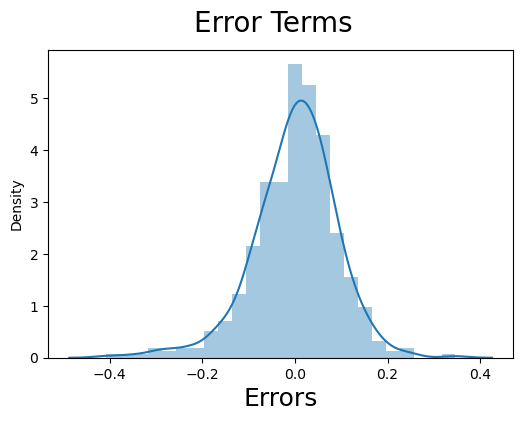

In [50]:
# Plotting histogram of error terms.
fig = plt.figure(figsize=(6,4))
sns.distplot((y_train - y_train_cnt), bins = 25)
fig.suptitle('Error Terms', fontsize =20)                  
plt.xlabel('Errors', fontsize = 18)    

#### Here, we can see the errors are normally distributed around 0, and hence our assumptions are true

MAKING PREDICTIONS


In [51]:
num_vars = ['temp','atemp','hum','windspeed','cnt']

APPLYING SCALING TO TEST DATA

In [52]:
df_test[num_vars]= scaler.transform(df_test[num_vars])


DIVIDING THE DEPENDENT AND INDEPENDENT VARIABLES

In [53]:
y_test = df_test.pop('cnt')
X_test = df_test

In [56]:
X_test_new = X_test[X_train_new.columns]
X_test_new = sm.add_constant(X_test_new)

In [57]:
#Making predictions using our 6th and final model

y_pred = lr6.predict(X_test_new)

MODEL EVALUATION

Text(0, 0.5, 'y_pred')

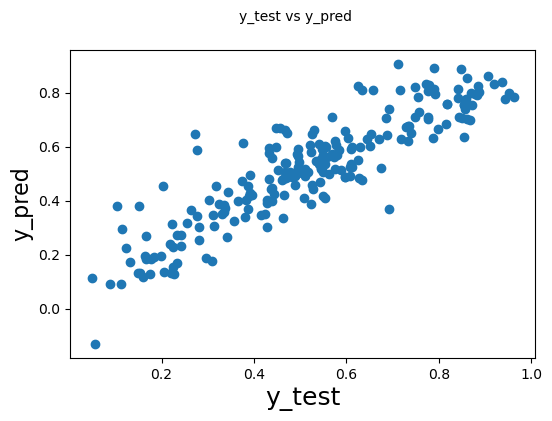

In [58]:
## Plotting y_test and y_pred to understand the spread.

fig = plt.figure(figsize=(6,4))
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=10)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 

#### we can see the y_test and y_pred shows a linear pattern

In [59]:
# calculating r2 for test 

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7931434526028905

### FINAL RESULT
1.r2 of train data 0.834

2.adjusted r2 of train data 0.831

3.r2 of test 0.793

4.Prob of f-statistic is very low, thereby, the overall model is significant

### FINAL REPORT

#### TOP PREDICTOR VARIABLES

#TEMP- INCREASE IN TEMPERATURE SHOWS POSITIVE RESULTS IN DEMAND

#YR- WITH INCREASING YEARS AN INCREASE IN DEMAND IS OBSERVED

#WEATHERSIT_3 (Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds) SHOWS NEGATIVE IMPACT ON DEMAND.

#### OTHER IMPORTANT VARIABLES

VARIABLES THAT POSITIVELY IMPACT THE DEMAND - MONTH AUG & SEP, SEASON SUMMER & WINTER
VARIABLES THAT NEGATIVELY IMPACT THE DEMAND - WINDSPEED, HOLIDAY AND WEATHERSIT_2